<a href="https://colab.research.google.com/github/haroonkhan-123/EdTech-Startup-Dashboard/blob/main/time_series_ethereum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
## Loading the dataset from yfinance library
# Download Ethereum (ETH-USD) data from 2020 to 2024
eth_data = yf.download('ETH-USD', start='2020-01-01', end='2024-12-31')

# Select only the needed columns
eth_data = eth_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Reset the index so that 'Date' becomes a column
eth_data.reset_index(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Fix MultiIndex columns if they exist (like 'Open', 'ETH-USD')
eth_data.columns = eth_data.columns.get_level_values(0)

# Optional: Rename columns explicitly (for clarity and correctness)
eth_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# Reset index (if Date is still in index)
eth_data.reset_index(drop=True, inplace=True)

# Check result
eth_data.head()


,Date,Open,High,Low,Close,Volume
0,2020-01-01,129.630661,132.835358,129.198288,130.802002,7935230330
1,2020-01-02,130.820038,130.820038,126.954910,127.410179,8032709256
2,2020-01-03,127.411263,134.554016,126.490021,134.171707,10476845358
3,2020-01-04,134.168518,136.052719,133.040558,135.069366,7430904515
4,2020-01-05,135.072098,139.410202,135.045624,136.276779,7526675353


## We make market analysis projection on Ethereum


#### ****Exploratory Data Analysis****
Line plots of price over time

Rolling averages (moving average trends)

Volume trends

Statistical summaries

Insights into trends, seasonality, volatility, and outliers

## *** Closing Price Over TimeLinePlot****
**bold text**

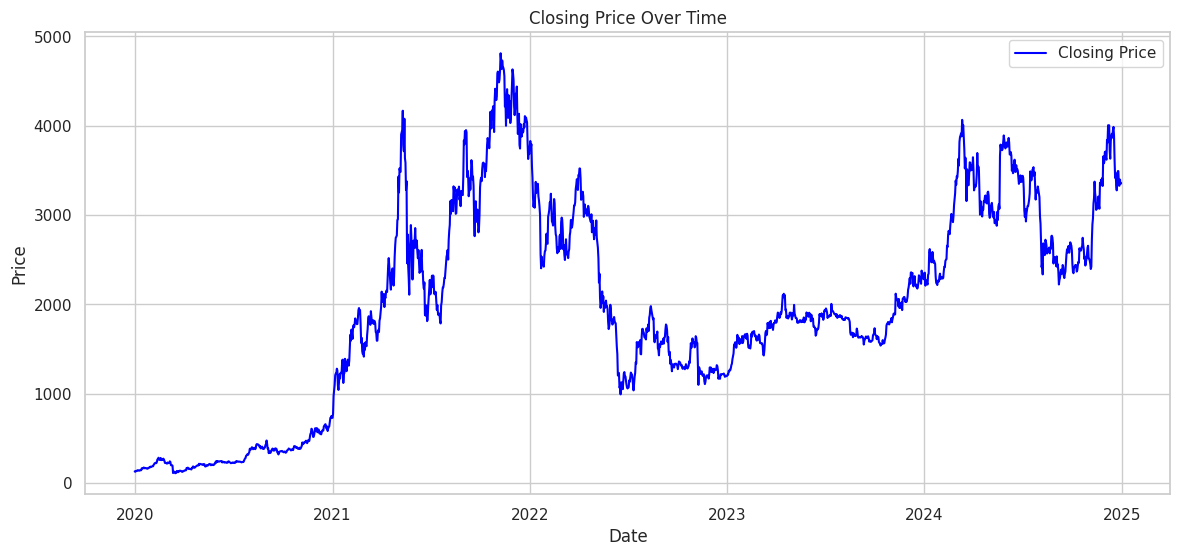

In [ ]:
## Now We Make the Lineplot  of closing price over time
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))
plt.plot(eth_data['Date'],eth_data['Close'],label='Closing Price',color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Closing Price Over Time")
plt.legend()
plt.show()

###  *** Rolling Averages Over 30 and 90 Days****

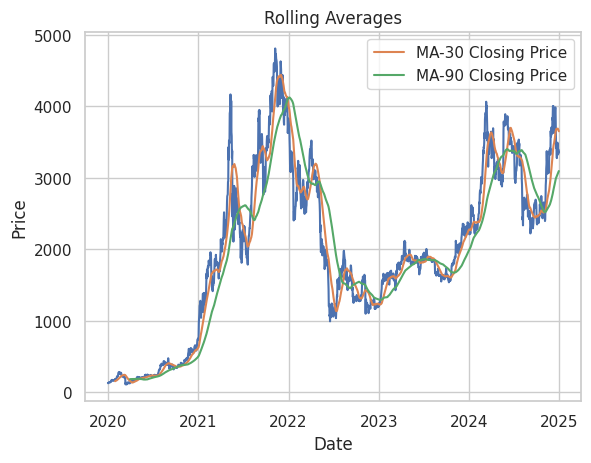

In [ ]:
## First we create two new columns then we plot it
eth_data['MA30']=eth_data['Close'].rolling(window=30).mean()
eth_data['MA90']=eth_data['Close'].rolling(window=90).mean()
sns.lineplot(data=eth_data,x='Date',y='Close')
sns.lineplot(data=eth_data,x='Date',y='MA30',label="MA-30 Closing Price")
sns.lineplot(data=eth_data,x='Date',y='MA90',label="MA-90 Closing Price")
plt.title("Rolling Averages")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## *** Vloume Trend Over Time****

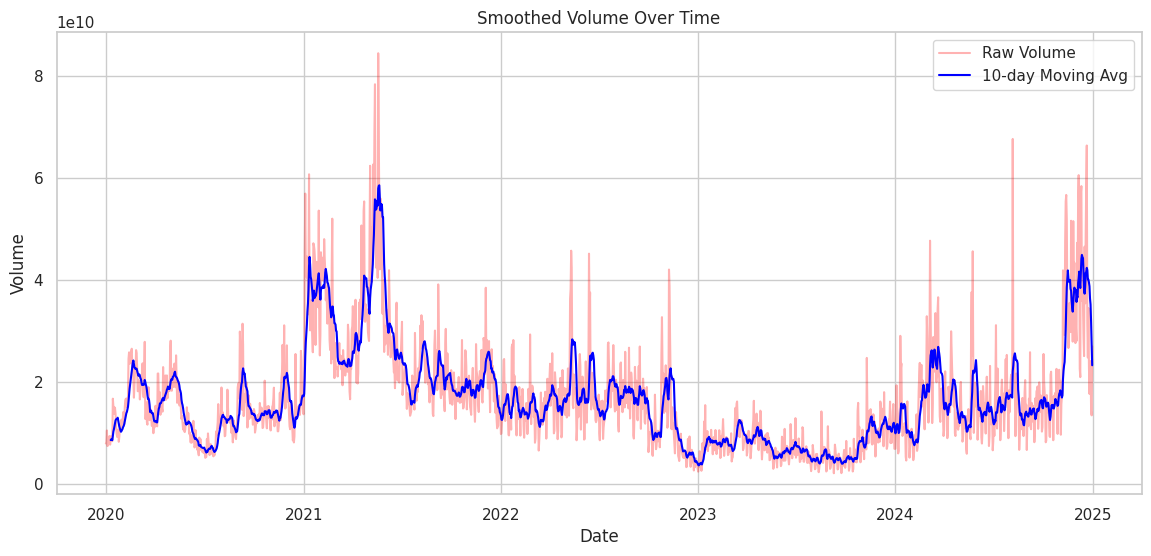

In [ ]:
eth_data['Volume_MA'] = eth_data['Volume'].rolling(window=10).mean()

plt.figure(figsize=(14,6))
plt.plot(eth_data['Date'], eth_data['Volume'], color='red', alpha=0.3, label='Raw Volume')
plt.plot(eth_data['Date'], eth_data['Volume_MA'], color='blue', label='10-day Moving Avg')
plt.title("Smoothed Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


### *** Statistical Summary ***

In [ ]:
eth_data.describe()

,Date,Open,High,Low,Close,Volume,MA30,MA90,Volume_MA
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03,1797.000000,1737.000000,1.817000e+03
mean,2022-07-01 12:00:00,1980.032840,2033.090281,1922.570778,1981.600074,1.669406e+10,1983.741987,1992.205829,1.670400e+10
min,2020-01-01 00:00:00,110.406784,116.021622,95.184303,110.605873,2.081626e+09,136.959600,178.975853,3.630602e+09
25%,2021-04-01 06:00:00,1250.664185,1281.565033,1211.789398,1251.954102,9.452774e+09,1310.279423,1385.297453,1.043745e+10
50%,2022-07-01 12:00:00,1869.789124,1904.886841,1839.892151,1870.897217,1.459358e+10,1862.963326,1852.596502,1.510732e+10
75%,2023-09-30 18:00:00,2890.993103,2961.298218,2786.070618,2894.424500,2.059002e+10,2873.608952,2844.758358,2.011442e+10
max,2024-12-30 00:00:00,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10,4442.874154,4126.118292,5.857237e+10
std,NaN,1148.003150,1178.978113,1112.597634,1147.276465,1.053916e+10,1117.277961,1059.711837,9.273650e+09


### ***  Seasonality***

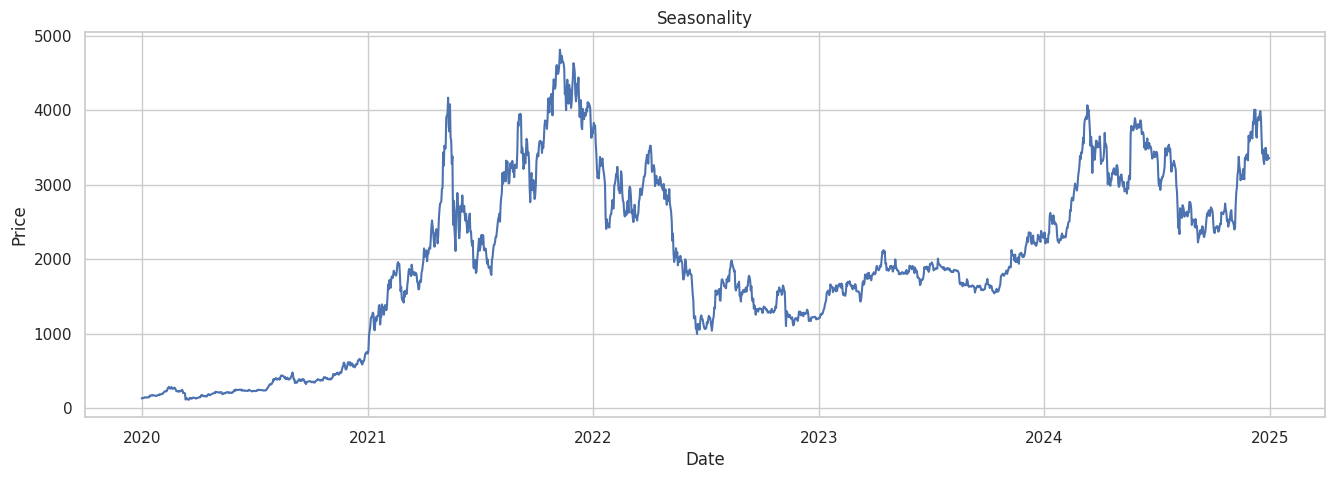

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(eth_data['Date'],eth_data['Close'])
plt.title("Seasonality")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

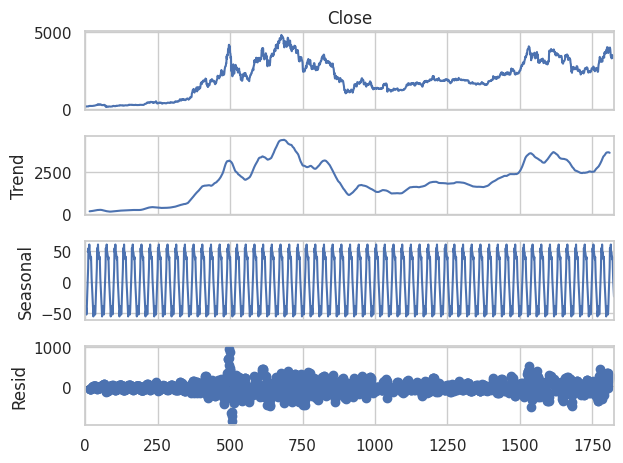

In [ ]:
## Apply Decomposition to make more better visualization

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(eth_data['Close'], model='additive', period=30)
result.plot()
plt.show()


### ***  Now We Analyze Volataity in Detail ****

In [ ]:
## First we calculate Daily returns
eth_data['returns']=eth_data['Close'].pct_change()
eth_data['returns'].head()

,returns
0,NaN
1,-0.025931
2,0.053069
3,0.006690
4,0.008939


In [ ]:
## Calculate Rolling Volatality Using Standard Deviation and we check volatality based on returns which is original volatality
eth_data['rolling_volatality']=eth_data['returns'].rolling(window=30).std()

<Axes: title={'center': '30 Day of Rolling Volatality Using ETH'}>

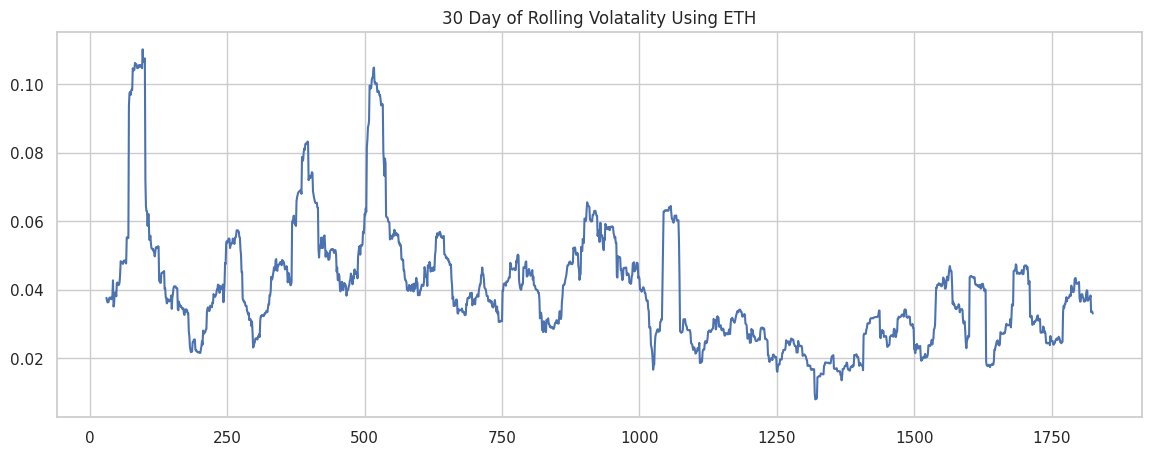

In [ ]:
## Now we make plots of rolling volatality
eth_data['rolling_volatality'].plot(figsize=(14,5),title='30 Day of Rolling Volatality Using ETH')


<Axes: title={'center': 'Return and Rolling Volatality'}>

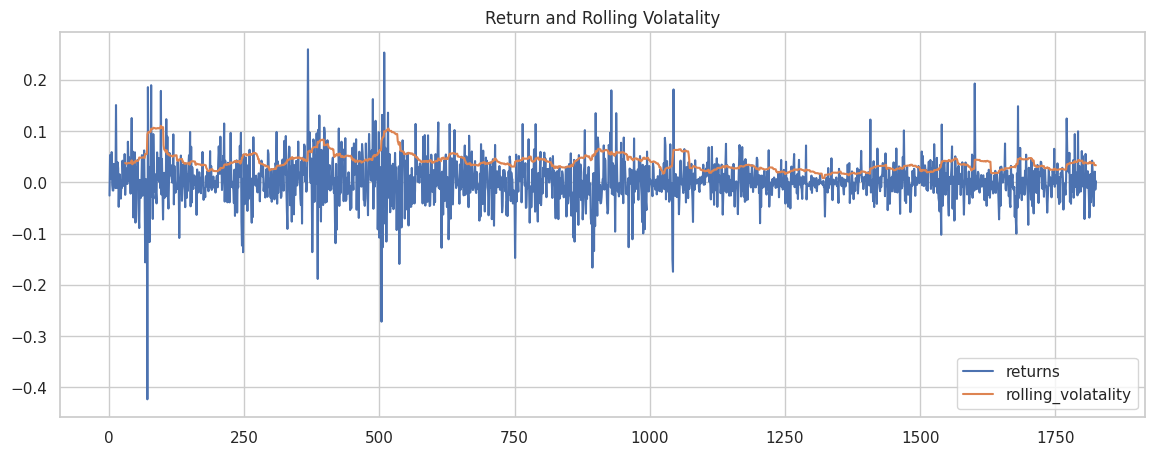

In [ ]:
## Now we make a plot of return and volatality togather
eth_data[['returns','rolling_volatality']].plot(figsize=(14,5),title='Return and Rolling Volatality')

### **** Identifying Outliers Using BoxPlot****

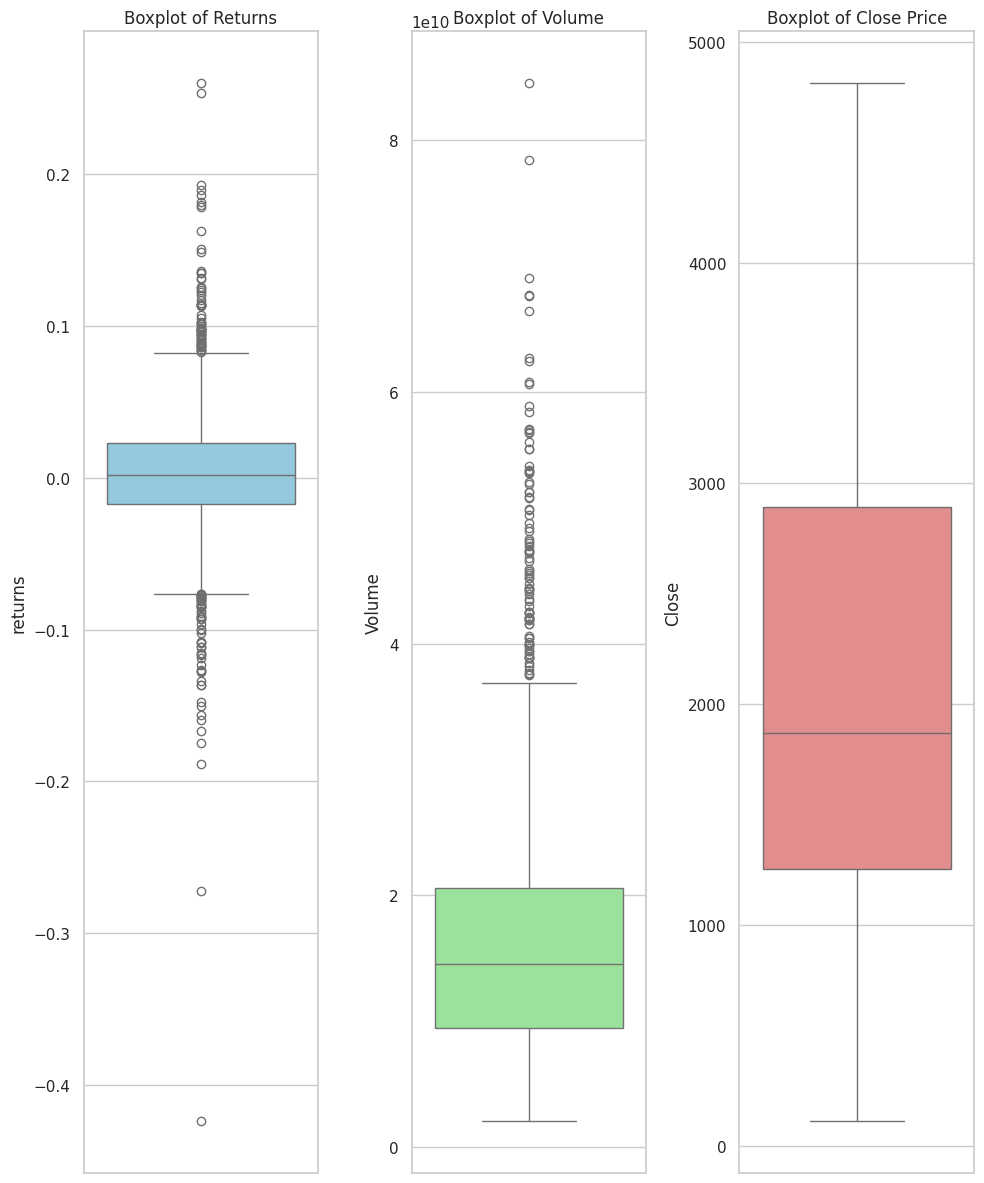

In [ ]:
## Making Box Plot of Rturns , volume , close to identify  daily basis price fluctuations
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 12))

# Boxplot 1: Returns
plt.subplot(1, 3, 1)
sns.boxplot(data=eth_data, y='returns', color='skyblue')
plt.title('Boxplot of Returns')


# Boxplot 2: Volume
plt.subplot(1, 3, 2)
sns.boxplot(data=eth_data, y='Volume', color='lightgreen')
plt.title('Boxplot of Volume')

# Boxplot 3: Close Price
plt.subplot(1, 3, 3)
sns.boxplot(data=eth_data, y='Close', color='lightcoral')
plt.title('Boxplot of Close Price')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
### Creating the function  for removing outliers
def removing_outliers_iqr(eth_data,column):
  Q1=eth_data[column].quantile(0.25)
  Q3=eth_data[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  return eth_data[(eth_data[column]>=lower_bound)& (eth_data[column]<=upper_bound)]


In [ ]:
## Calling the function
removing_outliers_iqr(eth_data,'returns')
removing_outliers_iqr(eth_data,'Volume')
removing_outliers_iqr(eth_data,'Close')

,Date,Open,High,Low,Close,Volume,MA30,MA90,Volume_MA,returns,rolling_volatality
0,2020-01-01,129.630661,132.835358,129.198288,130.802002,7935230330,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,130.820038,130.820038,126.954910,127.410179,8032709256,NaN,NaN,NaN,-0.025931,NaN
2,2020-01-03,127.411263,134.554016,126.490021,134.171707,10476845358,NaN,NaN,NaN,0.053069,NaN
3,2020-01-04,134.168518,136.052719,133.040558,135.069366,7430904515,NaN,NaN,NaN,0.006690,NaN
4,2020-01-05,135.072098,139.410202,135.045624,136.276779,7526675353,NaN,NaN,NaN,0.008939,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1821,2024-12-26,3493.304199,3512.604492,3302.306396,3331.225830,22247726776,3690.248535,3062.697339,3.634679e+10,-0.046378,0.038369
1822,2024-12-27,3331.053711,3436.710693,3302.575684,3328.916992,24091627403,3679.304126,3069.934871,3.521408e+10,-0.000693,0.033541
1823,2024-12-28,3328.774658,3419.920166,3318.033936,3397.902344,14305648523,3673.240487,3078.141043,3.174998e+10,0.020723,0.033613
1824,2024-12-29,3397.862549,3406.648438,3321.664795,3349.513428,13440907792,3665.107788,3086.434939,2.720615e+10,-0.014241,0.033682


### *** STATIONARITY TESTING ****

# In our task requirement  we apply stationarity in  raw and differenced data

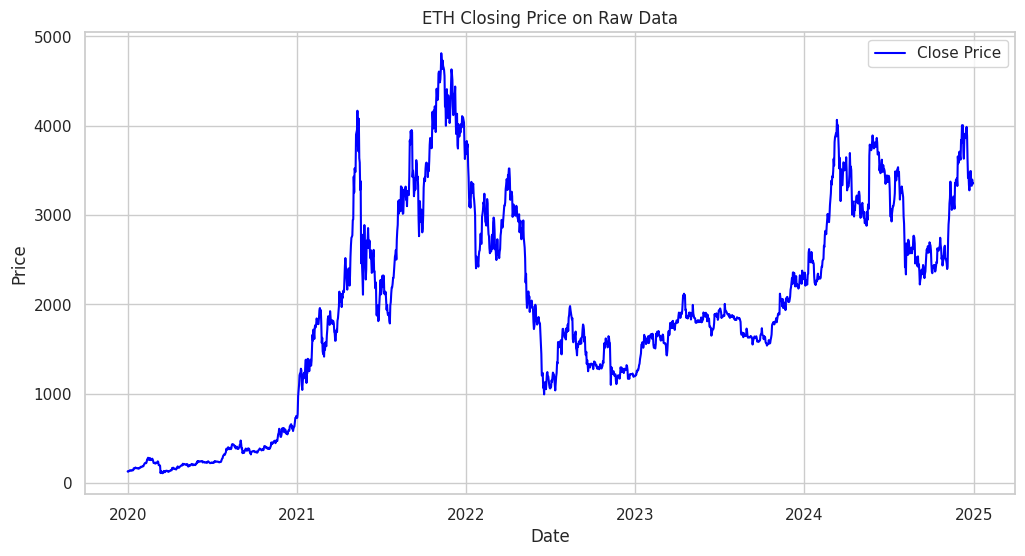

In [ ]:
## First we  check stationarity in our  Raw Data
## Make a plot on Close price over time so that i can check the weather raw data is stationary or not
plt.figure(figsize=(12,6))
plt.plot(eth_data['Date'],eth_data['Close'],label='Close Price',color='blue')
plt.title("ETH Closing Price on Raw Data")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
## Applying ADF Test On Raw Data To Check Weather this is stationariy or not
from statsmodels.tsa.stattools import adfuller
adfTest=adfuller(eth_data['Close'],autolag='AIC')
adfTest

(np.float64(-1.9388719525648033),
 np.float64(0.31400116530566735),
 6,
 1819,
 {'1%': np.float64(-3.4339500836471712),
  '5%': np.float64(-2.8631302362582534),
  '10%': np.float64(-2.567616588375528)},
 np.float64(21440.42137269813))

In [ ]:
##Converting Into DataFrame
import pandas as pd
statisticals=pd.Series(adfTest[0:4],index=['Test_Statistics','P_Value','#Lags_Used','No_of_Observations'])
statisticals

,0
Test_Statistics,-1.938872
P_Value,0.314001
#Lags_Used,6.000000
No_of_Observations,1819.000000


In [ ]:
##Now We Deal With  Criticality
for key, values in adfTest[4].items():
  print("Criticality",key ,':',values)

Criticality 1% : -3.4339500836471712
Criticality 5% : -2.8631302362582534
Criticality 10% : -2.567616588375528


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Define the function to check stationarity
def check_stationarity(eth_data, var):
    # Calculate rolling mean and std (note typo in rolling)
    eth_data['rollMean'] = eth_data[var].rolling(window=12).mean()
    eth_data['rollStd'] = eth_data[var].rolling(window=12).std()

    # Apply ADF Test
    adfTest = adfuller(eth_data[var], autolag='AIC')

    # Convert ADF test result into a pandas Series (note typo in Series)
    statisticals = pd.Series(adfTest[0:4], index=['Test Statistic', 'P-Value', '# Lags Used', 'No of Observations'])
    print(statisticals)

    # Print critical values
    for key, value in adfTest[4].items():
        print(f"Critical Value ({key}): {value}")

    # Plotting
    plt.figure(figsize=(12,6))
    sns.lineplot(data=eth_data, x=eth_data.index, y=var, label='Original')
    sns.lineplot(data=eth_data, x=eth_data.index, y='rollMean', label='Rolling Mean')
    sns.lineplot(data=eth_data, x=eth_data.index, y='rollStd', label='Rolling Std')
    plt.title(f"Stationarity Check for {var}")
    plt.legend()
    plt.show()


Test Statistic          -1.938872
P-Value                  0.314001
# Lags Used              6.000000
No of Observations    1819.000000
dtype: float64
Critical Value (1%): -3.4339500836471712
Critical Value (5%): -2.8631302362582534
Critical Value (10%): -2.567616588375528


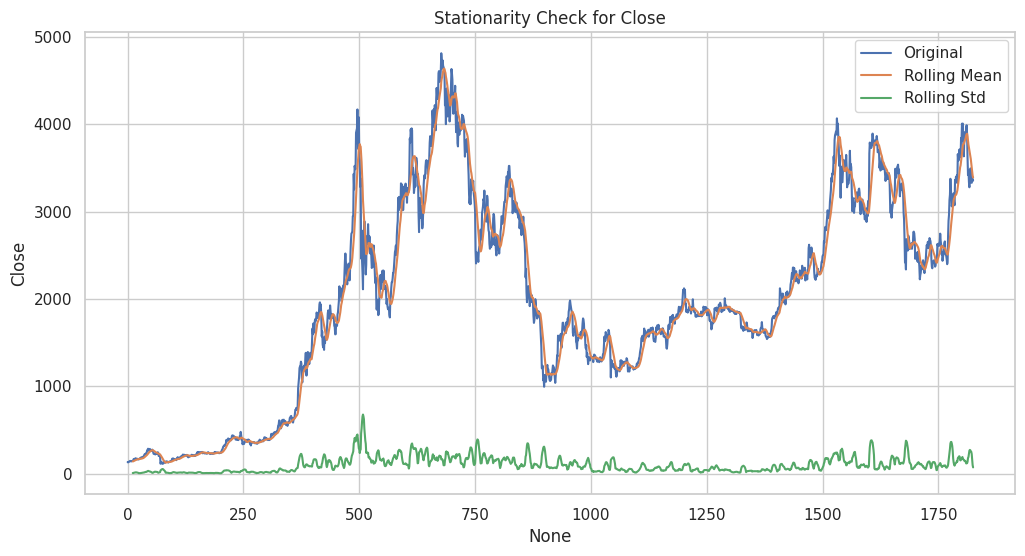

In [ ]:
## Calling the Function To Check weather this is stationary or not
check_stationarity(eth_data,'Close')

In [ ]:
## As Above We See Our Data is not Stationarity What we do we apply differncing on data to make it stationary
eth_data['Close_diff']=eth_data['Close'].diff()
## Drop NA Values
eth_data=eth_data.dropna()



Test Statistic       -1.631745e+01
P-Value               3.151845e-29
# Lags Used           5.000000e+00
No of Observations    1.731000e+03
dtype: float64
Critical Value (1%): -3.434133375964546
Critical Value (5%): -2.8632111492477503
Critical Value (10%): -2.5676596723058402


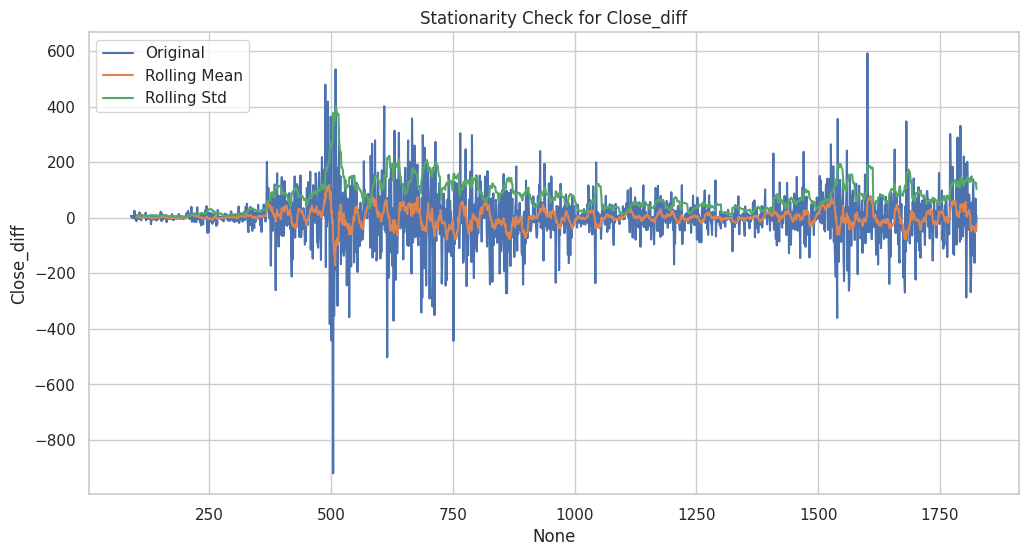

In [ ]:
## Now Check Stationariy Agian
check_stationarity(eth_data, 'Close_diff')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_acf(series, max_lag):
    series = np.array(series)
    n = len(series)
    mean = np.mean(series)
    var = np.var(series)

    acf_values = []
    for lag in range(max_lag + 1):
        if lag == 0:
            acf = 1.0
        else:
            num = np.sum((series[lag:] - mean) * (series[:-lag] - mean))
            acf = num / (n * var)
        acf_values.append(acf)

    return acf_values


In [ ]:
## Calling the Function to check  the acf values
compute_acf(eth_data['Close_diff'],max_lag=20)

[1.0,
 np.float64(-0.054440799219288835),
 np.float64(0.014806654514077429),
 np.float64(0.035255894173056995),
 np.float64(0.026218233184949376),
 np.float64(-0.06190348896223802),
 np.float64(0.06222336402808735),
 np.float64(-0.01801490270821368),
 np.float64(-0.03654059570334359),
 np.float64(0.020021465389677424),
 np.float64(0.019971345970351773),
 np.float64(-0.0013618823108475701),
 np.float64(-0.04439806634705183),
 np.float64(0.02217492861956489),
 np.float64(-0.02640323198415987),
 np.float64(0.004341343551923203),
 np.float64(-0.05563535042889264),
 np.float64(0.04077264921194676),
 np.float64(-0.030424964723408936),
 np.float64(-0.0228049682816021),
 np.float64(-0.01755658800754232)]

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def compute_pacf(series, max_lag):
    """
    Manually compute PACF values up to 'max_lag' using linear regression.

    Parameters:
        series: List or numpy array of time series data
        max_lag: Number of lags to calculate PACF for

    Returns:
        List of PACF values
    """
    pacf_values = [1.0]  # PACF at lag 0 is always 1
    series = np.array(series)

    for lag in range(1, max_lag + 1):
        X = []
        y = []

        # Create lagged features up to the current lag
        for t in range(lag, len(series)):
            X.append(series[t - lag:t][::-1])  # Reverse to keep order: [x(t-1), x(t-2), ..., x(t-lag)]
            y.append(series[t])

        X = np.array(X)
        y = np.array(y)

        # Fit linear regression: y = b0 + b1*x(t-1) + ... + bk*x(t-k)
        model = LinearRegression().fit(X, y)

        # Take only the coefficient for lag-k (i.e., direct effect of x(t-k))
        pacf_k = model.coef_[-1]
        pacf_values.append(pacf_k)

    return pacf_values


In [ ]:
compute_pacf(eth_data['Close'], max_lag=20)


[1.0,
 np.float64(0.9957381094946409),
 np.float64(0.0526685409131278),
 np.float64(-0.01356792662018639),
 np.float64(-0.03856610244114344),
 np.float64(-0.03194810885024384),
 np.float64(0.05840456100631964),
 np.float64(-0.05591881782257058),
 np.float64(0.010228432989730505),
 np.float64(0.03485089313000121),
 np.float64(-0.017715739087839813),
 np.float64(-0.019753572055250104),
 np.float64(-0.012493280431645645),
 np.float64(0.04840961472229689),
 np.float64(-0.014917857527219872),
 np.float64(0.01629004369914445),
 np.float64(-0.005359665843055259),
 np.float64(0.05587987571040786),
 np.float64(-0.03480503602370993),
 np.float64(0.013495192446760987),
 np.float64(0.028664498897251835)]

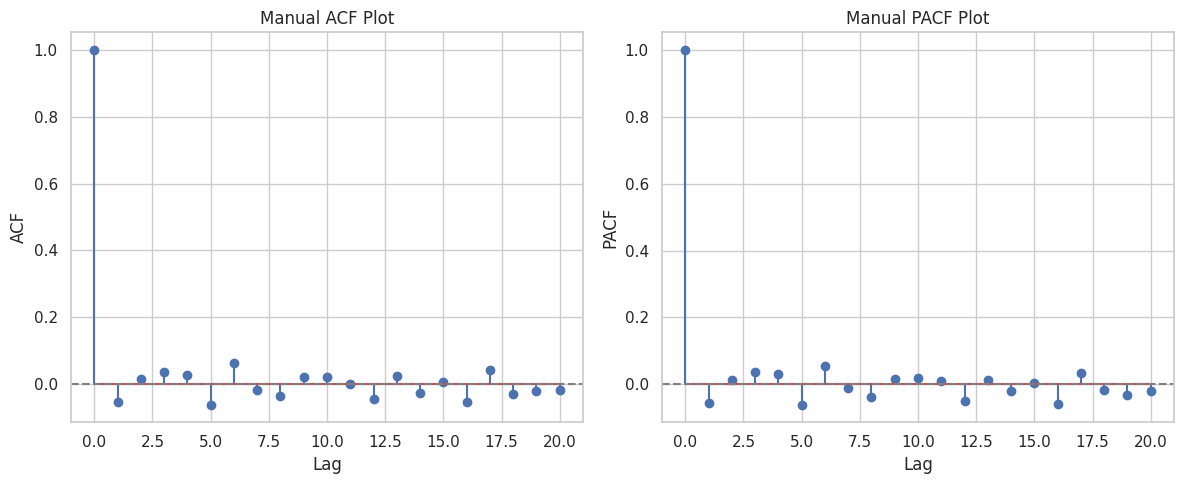

In [ ]:
##Now we Draw the plots of acf and pacf  to choose the values of  p and q
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load and clean your data
series = pd.to_numeric(eth_data['Close_diff'], errors='coerce').dropna()

# Step 2: Compute ACF and PACF values
max_lag = 20
acf_values = compute_acf(series, max_lag)
pacf_values = compute_pacf(series, max_lag)

# Step 3: Plot ACF and PACF
plt.figure(figsize=(12, 5))

# ACF Plot
# ACF Plot
plt.subplot(1, 2, 1)
plt.stem(range(max_lag + 1), acf_values)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title("Manual ACF Plot")
plt.xlabel("Lag")
plt.ylabel("ACF")

# PACF Plot
plt.subplot(1, 2, 2)
plt.stem(range(max_lag + 1), pacf_values)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title("Manual PACF Plot")
plt.xlabel("Lag")
plt.ylabel("PACF")

plt.tight_layout()
plt.show()


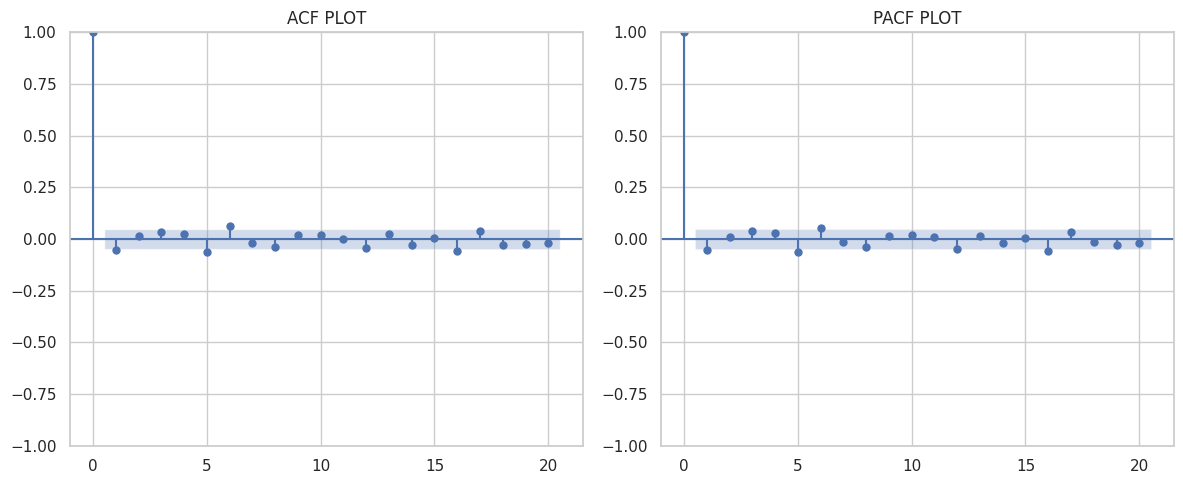

In [ ]:
## Now i draw both graph using libraries
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
 ## Setting the max_lags
maximum_lag=20
## Setting the figure size
plt.figure(figsize=(12,5))

 ## ACF PLOTS
plt.subplot(1,2,1)
plot_acf(eth_data['Close_diff'],lags=maximum_lag, ax =plt.gca())
plt.title("ACF PLOT")

## PACF PLot
plt.subplot(1,2,2)
plot_pacf(eth_data['Close_diff'],lags=maximum_lag,ax=plt.gca())
plt.title("PACF PLOT")


plt.tight_layout()
plt.show()



In [ ]:
## Now we implement ARIMA Model on that
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(eth_data['Close'],order=(1,1,1))
results=model.fit()
print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1737
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10371.886
Date:                Sat, 31 May 2025   AIC                          20749.772
Time:                        14:47:50   BIC                          20766.150
Sample:                             0   HQIC                         20755.829
                               - 1737                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1588      0.257     -0.617      0.537      -0.663       0.345
ma.L1          0.1048      0.260      0.403      0.687      -0.405       0.615
sigma2      9076.5088    136.226     66.628      0.0

### *** Evaluating The Model And Make It Improvements ***